# Text Mining and Search - Project

Master's Degree in Data Science (A.Y. 2021/2022)

Vittorio Menardo, Raffaele Moretti

#LIBRARY 

In [ ]:
import pandas as pd
import numpy as np
import os
import string
import collections
import re
import random
import wordcloud
import nltk
import seaborn as sns
from nltk.stem import PorterStemmer  
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.tokenize import word_tokenize
from yellowbrick.cluster import KElbowVisualizer
from nltk.tokenize import wordpunct_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import MWETokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import (rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score)
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data1 = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
#drive.mount('/content/drive')

In [ ]:
#data1 = pd.read_csv("/content/drive/MyDrive/Progetto Text Mining/Dataset/spam.csv", encoding='latin-1')

#DATASET

In [ ]:
data=data1[['v1','v2']]
data.rename(columns={"v1":"label", "v2":"text"}, inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Non ci sono valori nulli

In [ ]:
data.isnull().sum()

label    0
text     0
dtype: int64

Si osservano 5572 messaggi di cui 747 spam e 4825 ammissibili

In [ ]:
data.groupby('label').describe()


text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

## Grafici di distribuzione

Si osserva la distribuzione dei messaggi

Text(0.5, 1.0, 'Number of ham and spam messages')

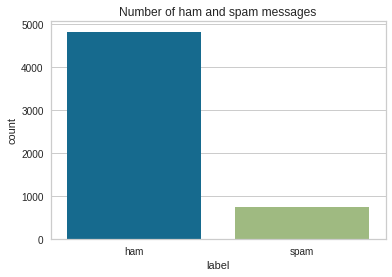

In [ ]:
sns.countplot(data = data, x = 'label')
plt.title('Number of ham and spam messages')

Creo una colonna ad hoc per poter rappresentare la distribuzione degli sms in base alla label

In [ ]:
data['length'] = data['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


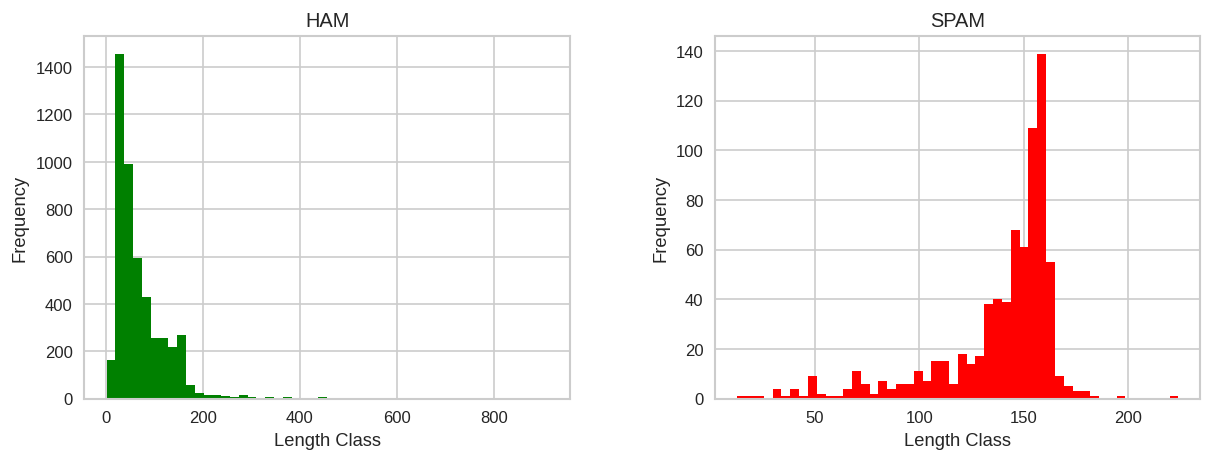

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4), dpi = 120)

data[data['label']=='ham'].hist(column='length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'HAM')
data[data['label']=='spam'].hist(column='length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'SPAM');

Si uniscono i grafici per comparare le distribuzioni

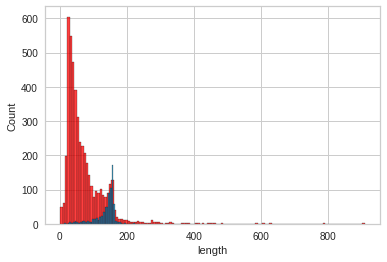

In [ ]:
sns.histplot(data[data['label'] == "ham"]['length'], color = 'red')
sns.histplot(data[data['label'] == "spam"]['length'])
plt.show()

#PREPROCESSING

##Cleaning

Definisco la funzione di pulizia delle emoji

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

Definisco la funzione di stopwords

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
more_stopwords = ['u', 'im', 'c']

def remove_stopwords_more(text):
    return ' '.join([word for word in text.split() if word not in more_stopwords])

Definisco la funzione per rimuovere gli spazi

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

Definisco la funzione per eliminare la punteggiatura

In [ ]:
def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))
    return text.translate(trans)

In [ ]:
PUNCTUATIONS = string.punctuation.replace('.','')
PUNCTUATIONS = string.punctuation.replace('..','')
PUNCTUATIONS = string.punctuation.replace('...','')

In [ ]:
data['preprocessed']=data.text.str.lower()
data.preprocessed = data.preprocessed.apply(lambda x: remove_whitespaces(x))
data.preprocessed = data.preprocessed.apply(lambda x: remove_emoji(x))
data.preprocessed = data.preprocessed.apply(lambda x: remove_punctuation(x))
data.preprocessed = data.preprocessed.apply(lambda text: remove_stopwords(text))
data.preprocessed = data.preprocessed.apply(lambda text: remove_stopwords_more(text))
data.preprocessed = data.preprocessed.str.replace(r'\d+', '', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.head()

,label,text,length,preprocessed
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though


##Tokenization

Si definisce la funzione per il task

In [ ]:
def postagger(token_words):
  return nltk.pos_tag(token_words)

In [ ]:
def most_common_wordcloud(tokens):

  most_common=nltk.FreqDist(tokens).most_common(50)
  most_common_dict = dict(most_common)
  
  wordcloud = WordCloud(height=400, width=800)
  wordcloud.generate_from_frequencies(frequencies=most_common_dict)
  plt.figure(figsize=(15, 15))
  plt.imshow(wordcloud)
  plt.axis("off")

In [ ]:
data["tokens"] = data.preprocessed.str.split()
data.head()

,label,text,length,preprocessed,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]"


### Visualizzo tutti i tokens in worcloud

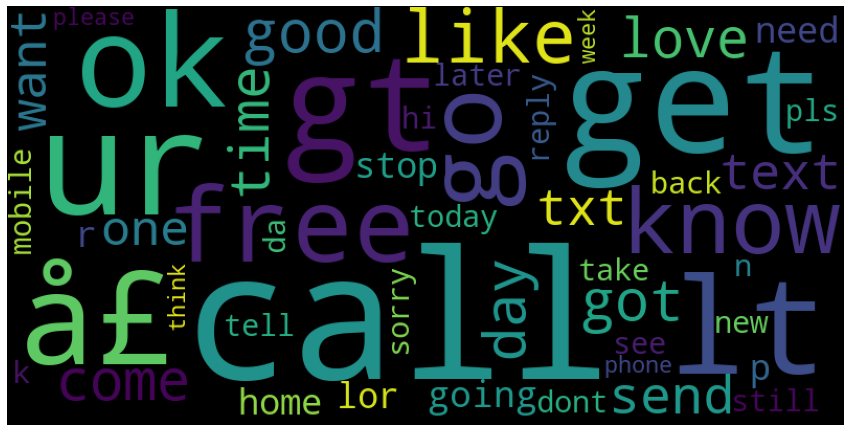

In [ ]:
all_tokens = data.tokens.sum()
most_common_wordcloud(all_tokens)
plt.show()

Vado a selezionare le righe di ham e spam in modo da rappresentare singolarmente le parole più rilevanti in emtrambe le labels

In [ ]:
ham = data.loc[data["label"] == "ham"]

In [ ]:
spam = data.loc[data["label"] == "spam"]

### Visualizzo i tokens dei messaggi ammissibili in wordcloud

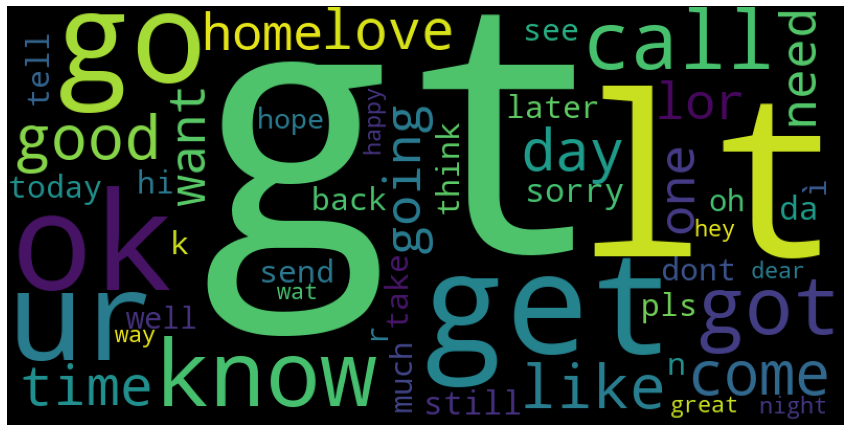

In [ ]:
all_tokens = ham.tokens.sum()
most_common_wordcloud(all_tokens)
plt.show()

### Visualizzo i tokens dei messaggi spam in wordcloud

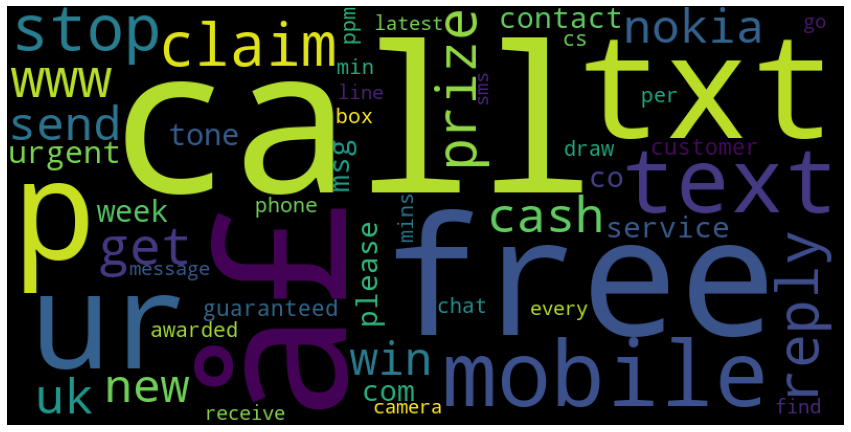

In [ ]:
all_tokens = spam.tokens.sum()
most_common_wordcloud(all_tokens)
plt.show()

## Lemmatization with POS tag

In [ ]:
data['pos_tags'] = data['tokens'].apply(nltk.tag.pos_tag)
data.head()

,label,text,length,preprocessed,tokens,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ..."


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
data['wordnet_pos'] = data['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data.head()

,label,text,length,preprocessed,tokens,pos_tags,wordnet_pos
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[(go, v), (jurong, a), (point, n), (crazy, n),..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[(ok, a), (lar, a), (joking, n), (wif, n), (on..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[(free, a), (entry, n), (wkly, v), (comp, n), ..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (al..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l..."


In [ ]:
wnl = WordNetLemmatizer()
data['lemmatized'] = data['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
data.head()

,label,text,length,preprocessed,tokens,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[(go, v), (jurong, a), (point, n), (crazy, n),...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[(ok, a), (lar, a), (joking, n), (wif, n), (on...","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[(free, a), (entry, n), (wkly, v), (comp, n), ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (al...","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l...","[nah, think, go, usf, life, around, though]"


In [ ]:
data.drop(labels=['pos_tags', 'wordnet_pos'], axis=1)

,label,text,length,preprocessed,tokens,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,nd time tried contact å£ pound prize claim e...,"[nd, time, tried, contact, å£, pound, prize, c...","[nd, time, try, contact, å£, pound, prize, cla..."
5568,ham,Will Ì_ b going to esplanade fr home?,37,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity mood suggestions,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interested, buying, so..."


## Si decide quindi di pulire il dataset per conservare soltanto le colonne d'interesse

Si osserva la differenza tra tokens e lemmatized per verificarne la corretta applicazione

In [ ]:
data.head(5)

,label,text,length,preprocessed,tokens,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[(go, v), (jurong, a), (point, n), (crazy, n),...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[(ok, a), (lar, a), (joking, n), (wif, n), (on...","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[(free, a), (entry, n), (wkly, v), (comp, n), ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,"[dun, say, early, hor, already, say]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (al...","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l...","[nah, think, go, usf, life, around, though]"


In [ ]:
data = data.drop(["length","tokens","pos_tags","wordnet_pos"], axis=1)
data.head(5)

,label,text,preprocessed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, go, usf, life, around, though]"


# TEXT REPRESENTATION


In [ ]:
def token_to_phrase(token_list):
    phrase_list = []
    
    for phrase in token_list:
        seq = ""
        for word in phrase:
            seq = seq + " " + word 
        phrase_list.append(seq)   
    return phrase_list

In [ ]:
lemmatized = data["lemmatized"].to_list()

In [ ]:
lemmatized_preprocessed  = token_to_phrase(token_list = lemmatized)

In [ ]:
vectorizer = TfidfVectorizer()
X_lemmatized_tfidf = vectorizer.fit_transform(lemmatized_preprocessed)

In [ ]:
X_lemmatized_tfidf

<5572x6729 sparse matrix of type '<class 'numpy.float64'>'
	with 44696 stored elements in Compressed Sparse Row format>

In [ ]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(data.preprocessed)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
tf_idf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_idf

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,ì¼,ìä,ìï,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TEXT CLASSIFICATION

Binary classification of messages

In [ ]:
corpus= []
for i in data["lemmatized"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [ ]:
data["corpus"] = corpus
data

,label,text,preprocessed,lemmatized,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,"[ok, lar, joking, wif, oni]",ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,"[dun, say, early, hor, already, say]",dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, go, usf, life, around, though]",nah think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact å£ pound prize claim e...,"[nd, time, try, contact, å£, pound, prize, cla...",nd time try contact å£ pound prize claim easy ...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home,"[ì, b, go, esplanade, fr, home]",ì b go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,"[pity, mood, suggestion]",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,"[guy, bitch, act, like, interested, buying, so...",guy bitch act like interested buying something...


In [ ]:
label_encoder = LabelEncoder()
data["target"] = label_encoder.fit_transform(data["label"])
data

,label,text,preprocessed,lemmatized,corpus,target
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,"[ok, lar, joking, wif, oni]",ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,"[dun, say, early, hor, already, say]",dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, go, usf, life, around, though]",nah think go usf life around though,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact å£ pound prize claim e...,"[nd, time, try, contact, å£, pound, prize, cla...",nd time try contact å£ pound prize claim easy ...,1
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home,"[ì, b, go, esplanade, fr, home]",ì b go esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,"[pity, mood, suggestion]",pity mood suggestion,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,"[guy, bitch, act, like, interested, buying, so...",guy bitch act like interested buying something...,0


In [ ]:
y = data["target"] 
X = data["corpus"]

## Creazione dei modelli

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [ ]:
vect = CountVectorizer()
X_train_transformed = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)

In [ ]:
classifiers = [MultinomialNB(), 
               RandomForestClassifier()]
for cls in classifiers:
    cls.fit(X_train_transformed, y_train)

In [ ]:
pipe_dict = {0: "NaiveBayes", 1: "RandomForest"}

In [ ]:
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train_transformed,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.974425 
RandomForest: 0.974647 


In [ ]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train_transformed)
    pred_test = i.predict(X_test_transformed)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = i.score(X_train_transformed,y_train)
    test_accuracy = i.score(X_test_transformed,y_test)
  
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
data_classification = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
Results = pd.DataFrame(data_classification, index =["NaiveBayes", "RandomForest"])

In [ ]:
cmap2 = ListedColormap(["#ffff99","#7fc97f"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.970060,0.941860,0.955752,0.986547,0.991923
RandomForest,0.986577,0.854651,0.915888,0.975785,1.000000


# TEXT CLUSTERING

Si prova a clusterizzare ipotizzando un numero di gruppi pari a quello delle categorie dei messaggi quindi ham e spam

In [ ]:
num_clusters = 2
km = KMeans(n_clusters = num_clusters, max_iter = 1000, n_init = 100, random_state = 1234).fit(X_train_transformed)
y_clus= km.predict(X_train_transformed)

Si visualizzano i risultati V measure e Adjust Rand Index

In [ ]:
print(f'''V measure- {v_measure_score(y_clus, y_train)}''')
print(f'''ARI- {adjusted_rand_score(y_clus,y_train)}''')

V measure- 0.17592805134083045
ARI- 0.3568872027590077


Si decide quindi di trovare un numero ottimale di cluster con altri criteri

Dimensionality reduction

In [ ]:
svd = TruncatedSVD()
x_svd = svd.fit_transform(X_lemmatized_tfidf) 

## Find the best number of clusters

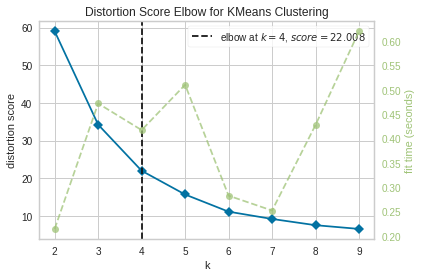

In [ ]:
model_km = KMeans(random_state=1234)
visualizer = KElbowVisualizer(model_km, k=(2, 10))
visualizer.fit(x_svd)
visualizer.show()

In [ ]:
# Compute KMeans clustering
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state = 1234)
clusters = kmeans.fit_predict(x_svd)

In [ ]:
data['cluster'] = clusters

In [ ]:
data.head()

,label,text,preprocessed,lemmatized,corpus,target,cluster
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,0,2
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,"[ok, lar, joking, wif, oni]",ok lar joking wif oni,0,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...,1,2
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,"[dun, say, early, hor, already, say]",dun say early hor already say,0,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, go, usf, life, around, though]",nah think go usf life around though,0,2


# EVALUATION

## Text Classification

Per quanto riguarda i modelli di text classification sono stati implementati Naive Bayes  e Random Forest, si opta per il secondo in quanto raggiunge risultati più performanti :

Accuracy del 98%

Recall del 87%

Precision del 99%


F-Measure 93%

Si visualizzano le confusion matrix dei modelli utilizzati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


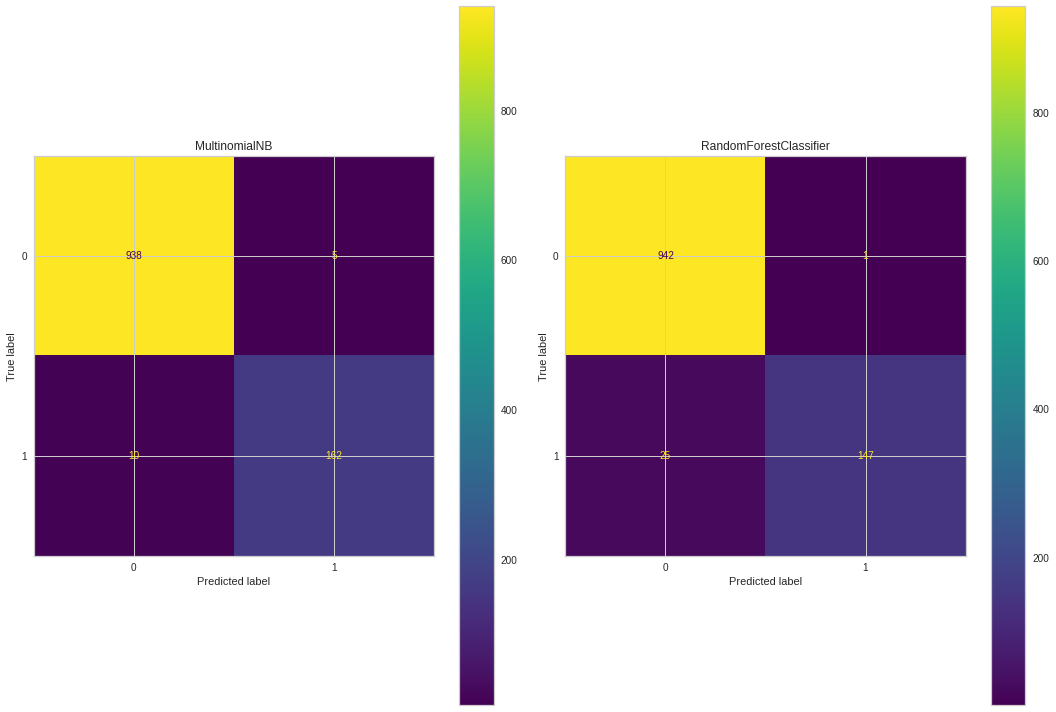

In [ ]:
#cmap = ListedColormap(["#ffff99", "#7fc97f"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_dtm, 
                          y_test, 
                          ax=ax, 
                          #cmap= cmap,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

## Clustering

Si fa una summary per vedere la distribuzione dei clusters

In [ ]:
ham = data.loc[data["label"] == "ham"] 

Si osserva che i messaggi ammissibili sono molto presenti in tutti i clusters. Nel cluster 2 particolarmente e nel terzo più che negli altri restanti

In [ ]:
ham[["cluster"]].value_counts()

cluster
2          4222
0           330
3           215
1            58
dtype: int64

In [ ]:
spam = data.loc[data["label"] == "spam"] 

Si osserva che i messaggi spam sono presenti particolarmente nel cluster 2 e 0

In [ ]:
spam[["cluster"]].value_counts()

cluster
2          418
0          327
3            2
dtype: int64

Si visualizzano messaggi del cluster 2 sia dei messaggi ammissibili che di quelli spam per confrontarli

In [ ]:
cluster2ham = data.loc[(data['label'] == 'ham') & (data['cluster'] == 2)]

In [ ]:
cluster2ham[["corpus"]].head(5)

,corpus
0,go jurong point crazy available bugis n great ...
3,dun say early hor already say
4,nah think go usf life around though
6,even brother like speak treat like aid patent
7,per request melle melle oru minnaminunginte nu...


In [ ]:
cluster2spam = data.loc[(data['label'] == 'spam') & (data['cluster'] == 2)]

In [ ]:
 cluster2spam[["corpus"]].head(5)

,corpus
2,free entry wkly comp win fa cup final tkts st ...
5,freemsg hey darling week word back like fun st...
11,six chance win cash pound txt csh send cost p ...
12,urgent week free membership å£ prize jackpot t...
15,xxxmobilemovieclub use credit click wap link n...


Si visualizzano messaggi del cluster 0 sia dei messaggi ammissibili che di quelli spam per confrontarli

In [ ]:
cluster0ham = data.loc[(data['label'] == 'ham') & (data['cluster'] == 0)]

In [ ]:
cluster0ham[["corpus"]].head(5)

,corpus
53,wow never realize embarassed accomodations thi...
75,wait machan call free
81,k call ah
85,call later network urgnt sm
91,sorry pain ok meet another night spend late af...


In [ ]:
cluster0spam = data.loc[(data['label'] == 'spam') & (data['cluster'] == 0)]

In [ ]:
 cluster0spam[["corpus"]].head(5)

,corpus
8,winner value network customer select receivea ...
9,mobile month r entitle update late colour mobi...
42,rodger burn msg try call reply sms free nokia ...
56,congrats year special cinema pas call suprman ...
65,value customer pleased advise follow recent re...


Si mostrano anche i testi del cluster 3 presente praticamente solo nei messaggi ammissibili

In [ ]:
cluster3ham = data.loc[(data['label'] == 'ham') & (data['cluster'] == 3)]

In [ ]:
cluster3ham[["corpus"]].head(5)

,corpus
1,ok lar joking wif oni
35,yup ok go home look timing msg ì xuhui go lear...
63,sorry roommate take forever ok come
82,ok way home hi hi
152,ok ur typical reply


Si seleziona il cluster presente solo nei messaggi ammissibili quindi il primo

In [ ]:
cluster1ham = data.loc[(data['label'] == 'ham') & (data['cluster'] == 1)]

In [ ]:
cluster1ham[["corpus"]].head(5)

,corpus
45,call message miss call
57,sorry call later meeting
74,call
80,sorry call later
222,sorry call later


Cluster metrics

In [ ]:
# Silhouette score
silhouette_score(x_svd, clusters, metric='euclidean')

0.6400660336096043

Cluster visualization

In [ ]:
# TruncatedSVD for 2D visualization
svd_2d = TruncatedSVD(n_components=2)
x_2d = svd.fit_transform(X_lemmatized_tfidf) 
scatter_x_2d = x_2d[:, 0]
scatter_y_2d = x_2d[:, 1]

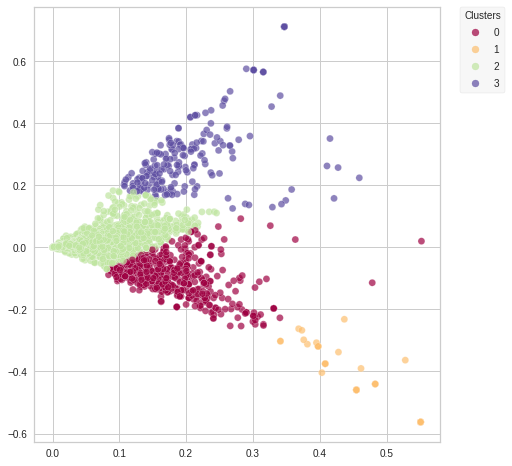

In [ ]:
fig = plt.figure(figsize=(16, 8))

# 2D scatter
ax = fig.add_subplot(1, 2, 1)
scatter1 = ax.scatter(x=scatter_x_2d, y=scatter_y_2d, c=data['cluster'], cmap='Spectral', edgecolor='white', alpha=0.7)

# Legend
legend = plt.legend(*scatter1.legend_elements(), bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0, title='Clusters', frameon=1, facecolor='whitesmoke')

plt.show()

Non riuscendo a trarre delle conclusioni dalla clusterizzazione a 2 gruppi si decide di mostrare una wordcloud per ogni cluster in modo da comprenderne il contenuto

In [ ]:
cluster0 = data.loc[(data['cluster'] == 0)]
cluster1 = data.loc[(data['cluster'] == 1)]
cluster2 = data.loc[(data['cluster'] == 2)]
cluster3 = data.loc[(data['cluster'] == 3)]

Cluster 2 presente in entrambi, ma in misura sproporzionata in ham

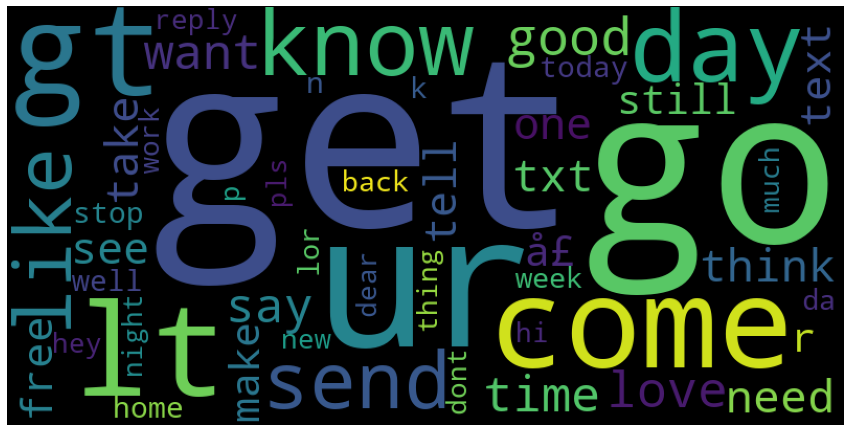

In [ ]:
all_tokens = cluster2.lemmatized.sum()
most_common_wordcloud(all_tokens)
plt.show()

Osservare i cluster 1 e 3 diventa quindi la scelta più sensata per verificare quali parola vengono usate maggiormente nei messaggi ammissibili che mancano quasi del tutto nei messaggi spam

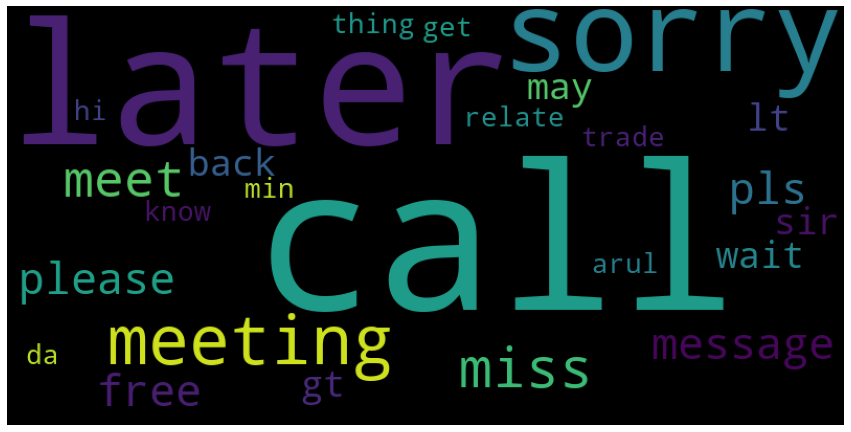

In [ ]:
all_tokens = cluster1.lemmatized.sum()
most_common_wordcloud(all_tokens)
plt.show()

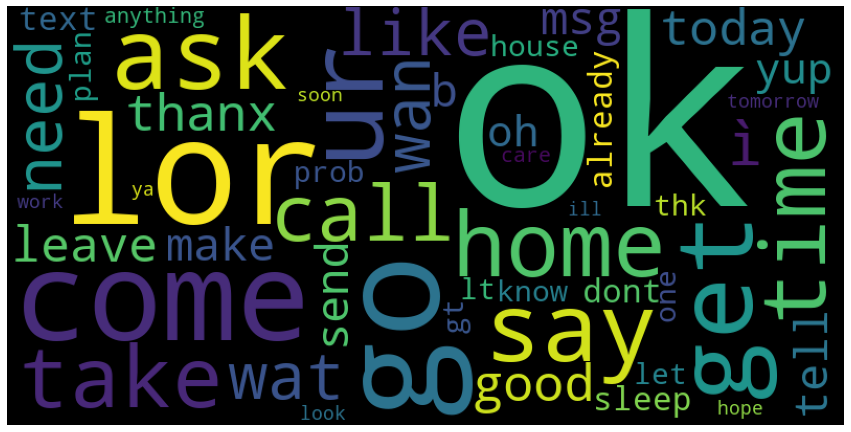

In [ ]:
all_tokens = cluster3.lemmatized.sum()
most_common_wordcloud(all_tokens)
plt.show()